[0, 5.426777777777776, 9.916185672946803, 14.056379259888367, 17.751238102894273, 21.01629725895753, 23.925076271864445, 26.532772865945983, 28.88324645213769, 31.01451539111651, 32.95684447190159, 34.73456497319199, 36.367613316549566, 37.872582025568924, 39.26598466328539, 40.56673388034941, 41.78408762794649, 42.925999161755655, 43.99936004447455, 45.01018715088198, 45.96376882799659, 46.864780718635885, 47.71737868600314, 48.52527420045749, 49.29179611685962, 50.01994176415052, 50.71352907405209, 51.41212167946873, 52.11582691597388, 52.82475415453608, 53.53901487180492]


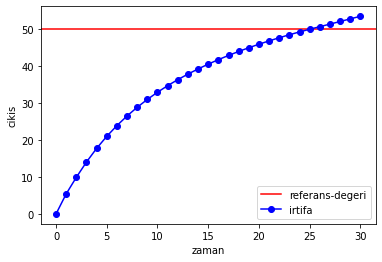

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

e = ctrl.Antecedent(np.arange(-50, 51, 1), 'err') #hata
#print(type(e))
de = ctrl.Antecedent(np.arange(-20, 21, 1), 'derr') #hata değişimi
u = ctrl.Consequent(np.arange(0, 11, 1), 'acc') #açısal ivme
#inputları oluşturuldu

e['Neg'] = fuzz.trimf(e.universe, [-50, -50, 0]) #grafikteki üçgensel sayıların değerlerini girdi
#print(e[1]) "Neg" ismini biz yazdık keyword değil
e['Zer'] = fuzz.trimf(e.universe, [-50, 0, 50])
e['Pos'] = fuzz.trimf(e.universe, [0, 50, 50]) 

de['Neg'] = fuzz.trimf(de.universe, [-20, -20, 0])
de['Zer'] = fuzz.trimf(de.universe, [-20, 0, 20])
de['Pos'] = fuzz.trimf(de.universe, [0, 20, 20]) 

u['Low'] = fuzz.trapmf(u.universe, [0, 0, 3, 7])
u['Hig'] = fuzz.trapmf(u.universe, [3, 7, 10, 10])

"""
# görselleştirme
e.view()
de.view()
u.view()
"""

rule1 = ctrl.Rule(e['Pos'] & de['Neg'], u['Hig'])
rule2 = ctrl.Rule(e['Pos'] & de['Zer'], u['Hig'])
rule3 = ctrl.Rule(e['Pos'] & de['Pos'], u['Hig'])
rule4 = ctrl.Rule(e['Zer'], u['Low'])
rule5 = ctrl.Rule(e['Neg'], u['Low'])

altitude_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5
])


altitude_sim = ctrl.ControlSystemSimulation(altitude_ctrl) #bulanık sistemdeki verileri tutar
ref = 50 #ulaşmak istediğimiz irtifa
h0 = 0 #helikopterin ilk yüksekliği 
step = 30 #çevirim sayısı
last_error = 0

sys_model = lambda x: 0.1*math.pow(x, 2) #modelin formülü

outputt = [h0] # output listesinde tutacak
for i in range(step):
    last_fb = outputt[i] #bulunduğumuz yükseklik
    error = ref - last_fb #son yükseklik ile ulaşmak istediğimiz irtifa arasında ne kadar mesafe var, olmamalı bu mesafe
    derror = error - last_error #son hatamız ile şimdiki hatamızın arasındaki fark
    altitude_sim.input['err'] = error 
    altitude_sim.input['derr'] = derror 
    altitude_sim.compute()
    x = altitude_sim.output['acc'] #açısal ivmenin output'unu x e atar
    outputt.append(sys_model(x) + last_fb) #sys_model ile tek satırda fonksiyon oluşturulur
    last_error = error 

print(outputt)

plt.axhline(ref, color = 'r', label = 'referans-degeri')
plt.plot(range(step+1), outputt, 'b', marker='o', label = 'irtifa')
plt.xlabel('zaman')
plt.ylabel('cikis')
plt.legend()
plt.show()

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


e = ctrl.Antecedent(np.arange(-50, 51, 1), 'pressure') 
de = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature') 
u = ctrl.Consequent(np.arange(0, 101, 1), 'co2percentage') 

#temprature, sıcaklık
e['vc'] = fuzz.trimf(e.universe, [7, 7, 9])
e['c'] = fuzz.trimf(e.universe, [7, 9, 11])
e['n'] = fuzz.trimf(e.universe, [10, 12, 14])
e['h'] = fuzz.trimf(e.universe, [12 ,14 ,16])
e['vh'] = fuzz.trimf(e.universe, [13 ,16 ,16])

#basınç
de['vb'] = fuzz.trimf(e.universe, [1.75, 2.25, 2.25])
de['b'] = fuzz.trimf(e.universe, [1.75, 2.25, 2.50])
de['n'] = fuzz.trimf(e.universe, [2.25, 2.75, 3.25])
de['g'] = fuzz.trimf(e.universe, [2.50, 3.25, 3.50])
de['vg'] = fuzz.trimf(e.universe, [2.75, 4.00, 4.00])

#karbondioksit yüzdesi
u['verybad'] = fuzz.trimf(e.universe, [2.0 ,2.0 ,3.0])
u['bad'] = fuzz.trimf(e.universe, [2.0, 3.0, 4.0])
u['normal'] = fuzz.trimf(e.universe, [3.0, 4.0, 5.0])
u['good'] = fuzz.trimf(e.universe, [4.0, 5.0, 6.0])
u['verygood'] = fuzz.trimf(e.universe, [5.0, 6.0, 6.0])



# e sıcaklık, de basınç
rule1_n = ctrl.Rule(e['vc'] & de['vb'], u['normal'])
rule2_n = ctrl.Rule(e['vc'] & de['b'], u['normal'])
rule3_n = ctrl.Rule(e['n'] & de['b'], u['normal'])
rule4_n = ctrl.Rule(e['n'] & de['n'], u['normal'])
rule5_n = ctrl.Rule(e['h'] & de['n'], u['normal'])
rule6_n = ctrl.Rule(e['h'] & de['g'], u['normal'])
rule7_n = ctrl.Rule(e['vh'] & de['n'], u['normal'])
rule8_n = ctrl.Rule(e['vh'] & de['g'], u['normal'])

rule1_g = ctrl.Rule(e['vc'] & de['n'], u['good'])
rule2_g = ctrl.Rule(e['c'] & de['b'], u['good'])
rule3_g = ctrl.Rule(e['c'] & de['n'], u['good'])
rule4_g = ctrl.Rule(e['c'] & de['g'], u['good'])
rule5_g = ctrl.Rule(e['n'] & de['g'], u['good'])
rule6_g = ctrl.Rule(e['h'] & de['vg'], u['good'])
rule7_g = ctrl.Rule(e['vh'] & de['vg'], u['good'])

rule1_vg = ctrl.Rule(e['vc'] & de['g'], u['verygood'])
rule2_vg = ctrl.Rule(e['vc'] & de['vg'], u['verygood'])
rule3_vg = ctrl.Rule(e['c'] & de['vg'], u['verygood'])
rule4_vg = ctrl.Rule(e['n'] & de['vg'], u['verygood'])

rule1_b = ctrl.Rule(e['c'] & de['vb'], u['bad'])
rule2_b = ctrl.Rule(e['n'] & de['vb'], u['bad'])
rule3_b = ctrl.Rule(e['h'] & de['vb'], u['bad'])
rule4_b = ctrl.Rule(e['h'] & de['b'], u['bad'])
rule5_b = ctrl.Rule(e['vh'] & de['b'], u['bad'])

rule1_vb = ctrl.Rule(e['vh'] & de['vb'], u['verybad'])


altitude_ctrl = ctrl.ControlSystem([
    rule1_n, rule2_n, rule3_n, rule4_n, rule5_n, rule6_n, rule7_n, rule8_n,
    rule1_g, rule2_g, rule3_g, rule4_g, rule5_g, rule6_g, rule7_g,
    rule1_vg, rule2_vg, rule3_vg, rule4_vg,
    rule1_b, rule2_b, rule3_b, rule4_b, rule5_b,
    rule1_vb
])
altitude_sim = ctrl.ControlSystemSimulation(altitude_ctrl)  
"""

 PV = nRT deki hacim sabit ,R=8.3145 J/(mol K) ,P belli ,V sabit(sadeleştirelim) ,T belli ,n aranıyor
 ?????------------- V yerine klasik bir gazoz şişesinin hacmini koysak --------------?????
 P = n*8.3145*T ise n = P/(8.3145*T) formülüyle molünü bulabiliriz.

"""
#ref = 50 ulaşmak istediğimiz irtifa
T = 8
P = 3.00
h0 = 0 #ilk output 
step = 30 #dönme sayısı
last_pre = 0 #son basınç
last_tem = 0 #son sıcaklık





In [ ]:
#print(type(e))

In [ ]:
import skfuzzy

In [2]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 12.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=52421a2789da0b8569fb181d3af2238610b8e3c912faa759d29a893424d749e0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
print(e[1])